# PARTE 4.2.1. - MODELLING - RANDOM FOREST

¿QUÉ FUNCIONA?
* n_estimators=5, max_depth=10, random_state=42
* SUBMUESTREO
* CAMBIO DE UMBRAL a 0.3 y 0.4, ¿no sé cuál funciona mejor? (DUDA TUTOR)


MEJOR OPCIÓN: 5 (DEL PDF COMPARATIVA)

## Importación librerías y lectura del DF

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Lectura DF
df = pd.read_csv('/content/drive/MyDrive/MASTER_DATA_SCIENCE/Entregables & TFM/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/HEART_DISEASE_PREMODELLING.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13308 entries, 0 to 13307
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HEIGHT                         13308 non-null  float64
 1   WAIST_CIRCUMFERENCE_LOG        13308 non-null  float64
 2   SYSTOLIC_MEAN_LOG              13308 non-null  float64
 3   DIASTOLIC_MEAN                 13308 non-null  float64
 4   PULSE_MEAN_LOG                 13308 non-null  float64
 5   ALBUMIN_URINE_LOG              13308 non-null  float64
 6   CREATININE_URINE_LOG           13308 non-null  float64
 7   HDL_LOG                        13308 non-null  float64
 8   TOTAL_CHOLE_LOG                13308 non-null  float64
 9   LYMPHOCYTE_LOG                 13308 non-null  float64
 10  MONOCYTE_LOG                   13308 non-null  float64
 11  SEGM_NEUTROPHILS_LOG           13308 non-null  float64
 12  EOSINOPHILS                    13308 non-null 

In [ ]:
df.shape

(13308, 66)

## TRAIN / TEST SPLIT

In [ ]:
# DEFINIMOS TARGET
target = df["HEART_DISEASE"]

In [ ]:
# Separar las características (X) de la variable objetivo (y)
x = df.drop("HEART_DISEASE", axis=1)
y = df["HEART_DISEASE"]

In [ ]:
x.shape

(13308, 65)

In [ ]:
y.shape

(13308,)

In [ ]:
# Seleccionamos muestra aleatoria
validation = int(len(df) * 0.2)
df_val = df.sample(n=validation, random_state=42)

In [ ]:
# Incluir el resto de los datos en el df_dev
df_dev = df.drop(df_val.index)

In [ ]:
# Comprobar que esten todas las filas
df_val.shape[0]+df_dev.shape[0]

13308

In [ ]:
df_val.shape[0]

2661

In [ ]:
df_dev.shape[0]

10647

In [ ]:
df_dev_x=df_dev.drop("HEART_DISEASE", axis=1)
df_dev_y=df_dev["HEART_DISEASE"]

In [ ]:
df_val_x=df_dev.drop("HEART_DISEASE", axis=1)
df_val_y=df_dev["HEART_DISEASE"]

In [ ]:
from sklearn import model_selection

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df_dev_x, df_dev_y, test_size=0.30, random_state=42)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size=0.30, random_state=42)

In [ ]:
y_train.describe().T.head()

count    9315.000000
mean        0.215674
std         0.411311
min         0.000000
25%         0.000000
Name: HEART_DISEASE, dtype: float64

In [ ]:
y_test.describe().T.head()

count    3993.000000
mean        0.213874
std         0.410090
min         0.000000
25%         0.000000
Name: HEART_DISEASE, dtype: float64

Como la media del target en test y train es la misma, la reparticion de las filas esta balanceada.

## Model definition: Random Forest Classifier

### n_estimators=5, max_depth=5, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

plt.figure(figsize=(8,8))
dot_data_0 = export_graphviz(
                        decision_tree = tree_list[0],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_0)
graph
graph.render("rf_0", format='png', view=False)

from google.colab import files
files.download("rf_0.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_1 = export_graphviz(
                        decision_tree = tree_list[1],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_1)
graph
graph.render("rf_1", format='png', view=False)

from google.colab import files
files.download("rf_1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_2 = export_graphviz(
                        decision_tree = tree_list[2],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_2)
graph
graph.render("rf_2", format='png', view=False)

from google.colab import files
files.download("rf_2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3157)

In [ ]:
results_rf['Success'].mean()

np.float64(0.790633608815427)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3157 registros de un total de 3993, por tanto el Accuracy es 0.790633608815427.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3096  43
1                         793  61

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.790633608815427)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.12734864300626306

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      3139
           1       0.59      0.07      0.13       854

    accuracy                           0.79      3993
   macro avg       0.69      0.53      0.50      3993
weighted avg       0.75      0.79      0.72      3993



### n_estimators=100, max_depth=5, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

plt.figure(figsize=(8,8))
dot_data_0 = export_graphviz(
                        decision_tree = tree_list[0],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_0)
graph
graph.render("rf_0", format='png', view=False)

from google.colab import files
files.download("rf_0.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_1 = export_graphviz(
                        decision_tree = tree_list[1],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_1)
graph
graph.render("rf_1", format='png', view=False)

from google.colab import files
files.download("rf_1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_2 = export_graphviz(
                        decision_tree = tree_list[2],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_2)
graph
graph.render("rf_2", format='png', view=False)

from google.colab import files
files.download("rf_2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3143)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7871274730778863)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3143 registros de un total de 3993, por tanto el Accuracy es 0.7871274730778863.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3131   8
1                         842  12

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7871274730778863)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.02745995423340961

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3139
           1       0.60      0.01      0.03       854

    accuracy                           0.79      3993
   macro avg       0.69      0.51      0.45      3993
weighted avg       0.75      0.79      0.70      3993



### n_estimators=50, max_depth=5, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

plt.figure(figsize=(8,8))
dot_data_0 = export_graphviz(
                        decision_tree = tree_list[0],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_0)
graph
graph.render("rf_0", format='png', view=False)

from google.colab import files
files.download("rf_0.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_1 = export_graphviz(
                        decision_tree = tree_list[1],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_1)
graph
graph.render("rf_1", format='png', view=False)

from google.colab import files
files.download("rf_1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_2 = export_graphviz(
                        decision_tree = tree_list[2],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_2)
graph
graph.render("rf_2", format='png', view=False)

from google.colab import files
files.download("rf_2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3144)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7873779113448535)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3144 registros de un total de 3993, por tanto el Accuracy es 0.7873779113448535.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3129  10
1                         839  15

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7873779113448535)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.034129692832764506

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3139
           1       0.60      0.02      0.03       854

    accuracy                           0.79      3993
   macro avg       0.69      0.51      0.46      3993
weighted avg       0.75      0.79      0.70      3993



### n_estimators=30, max_depth=5, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=30, max_depth=5, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=30, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                       random_state=1935803228)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

plt.figure(figsize=(8,8))
dot_data_0 = export_graphviz(
                        decision_tree = tree_list[0],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_0)
graph
graph.render("rf_0", format='png', view=False)

from google.colab import files
files.download("rf_0.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_1 = export_graphviz(
                        decision_tree = tree_list[1],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_1)
graph
graph.render("rf_1", format='png', view=False)

from google.colab import files
files.download("rf_1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_2 = export_graphviz(
                        decision_tree = tree_list[2],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_2)
graph
graph.render("rf_2", format='png', view=False)

from google.colab import files
files.download("rf_2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3153)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7896318557475582)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3153 registros de un total de 3993, por tanto el Accuracy es 0.7896318557475582.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3126  13
1                         827  27

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7896318557475582)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.06040268456375839

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3139
           1       0.68      0.03      0.06       854

    accuracy                           0.79      3993
   macro avg       0.73      0.51      0.47      3993
weighted avg       0.77      0.79      0.71      3993



### n_estimators=5, max_depth=10, random_state=42 - EL QUE MÁS DETECTA

In [ ]:
rf= RandomForestClassifier(n_estimators=5, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1935803228)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

plt.figure(figsize=(8,8))
dot_data_0 = export_graphviz(
                        decision_tree = tree_list[0],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_0)
graph
graph.render("rf_0", format='png', view=False)

from google.colab import files
files.download("rf_0.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_1 = export_graphviz(
                        decision_tree = tree_list[1],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_1)
graph
graph.render("rf_1", format='png', view=False)

from google.colab import files
files.download("rf_1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_2 = export_graphviz(
                        decision_tree = tree_list[2],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_2)
graph
graph.render("rf_2", format='png', view=False)

from google.colab import files
files.download("rf_2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3152)

In [ ]:
results_rf['Success'].mean()

np.float64(0.789381417480591)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3152 registros de un total de 3993, por tanto el Accuracy es 0.789381417480591.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        3016  123
1                         718  136

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.789381417480591)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.24438454627133874

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3139
           1       0.53      0.16      0.24       854

    accuracy                           0.79      3993
   macro avg       0.67      0.56      0.56      3993
weighted avg       0.75      0.79      0.74      3993



### n_estimators=5, max_depth=7, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=5, max_depth=7, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=7, max_features='sqrt',
                       random_state=1935803228)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

plt.figure(figsize=(8,8))
dot_data_0 = export_graphviz(
                        decision_tree = tree_list[0],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_0)
graph
graph.render("rf_0", format='png', view=False)

from google.colab import files
files.download("rf_0.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_1 = export_graphviz(
                        decision_tree = tree_list[1],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_1)
graph
graph.render("rf_1", format='png', view=False)

from google.colab import files
files.download("rf_1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_2 = export_graphviz(
                        decision_tree = tree_list[2],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_2)
graph
graph.render("rf_2", format='png', view=False)

from google.colab import files
files.download("rf_2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3155)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7901327322814926)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3155 registros de un total de 3993, por tanto el Accuracy es 0.7901327322814926.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3068  71
1                         767  87

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7901327322814926)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.17193675889328064

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3139
           1       0.55      0.10      0.17       854

    accuracy                           0.79      3993
   macro avg       0.68      0.54      0.53      3993
weighted avg       0.75      0.79      0.73      3993



### n_estimators=100, max_depth=10, random_state=42

In [ ]:
rf= RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1935803228)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

plt.figure(figsize=(8,8))
dot_data_0 = export_graphviz(
                        decision_tree = tree_list[0],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_0)
graph
graph.render("rf_0", format='png', view=False)

from google.colab import files
files.download("rf_0.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_1 = export_graphviz(
                        decision_tree = tree_list[1],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_1)
graph
graph.render("rf_1", format='png', view=False)

from google.colab import files
files.download("rf_1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_2 = export_graphviz(
                        decision_tree = tree_list[2],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_2)
graph
graph.render("rf_2", format='png', view=False)

from google.colab import files
files.download("rf_2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

#### Model evaluation: Random Forest Classifier

##### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               0
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        0        0
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        0        0
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        0        1
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        0        0
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(3176)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7953919358878037)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 3176 registros de un total de 3993, por tanto el Accuracy es 0.7953919358878037.


##### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0   1
HEART_DISEASE_original           
0                        3102  37
1                         780  74

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7953919358878037)

##### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.1533678756476684

##### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      3139
           1       0.67      0.09      0.15       854

    accuracy                           0.80      3993
   macro avg       0.73      0.54      0.52      3993
weighted avg       0.77      0.80      0.73      3993



### SOBREMUESTREO

In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Forma de x_train original:", x_train.shape)
print("Forma de y_train original:", y_train.shape)
print("Forma de x_train_resampled:", x_train_resampled.shape)
print("Forma de y_train_resampled:", y_train_resampled.shape)

# Verificar la distribución de clases en el conjunto sobremuestreado
print("\nDistribución de clases en y_train original:")
print(y_train.value_counts())
print("\nDistribución de clases en y_train_resampled:")
print(y_train_resampled.value_counts())

Forma de x_train original: (9315, 65)
Forma de y_train original: (9315,)
Forma de x_train_resampled: (14612, 65)
Forma de y_train_resampled: (14612,)

Distribución de clases en y_train original:
HEART_DISEASE
0    7306
1    2009
Name: count, dtype: int64

Distribución de clases en y_train_resampled:
HEART_DISEASE
0    7306
1    7306
Name: count, dtype: int64


##### n_estimators=5, max_depth=10, random_state=42 - EL QUE MÁS DETECTA

In [ ]:
rf= RandomForestClassifier(n_estimators=5, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, n_estimators=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1935803228)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

plt.figure(figsize=(8,8))
dot_data_0 = export_graphviz(
                        decision_tree = tree_list[0],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_0)
graph
graph.render("rf_0", format='png', view=False)

from google.colab import files
files.download("rf_0.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_1 = export_graphviz(
                        decision_tree = tree_list[1],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_1)
graph
graph.render("rf_1", format='png', view=False)

from google.colab import files
files.download("rf_1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_2 = export_graphviz(
                        decision_tree = tree_list[2],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_2)
graph
graph.render("rf_2", format='png', view=False)

from google.colab import files
files.download("rf_2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

##### Model evaluation: Random Forest Classifier

###### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               1
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        1        1
12281                       0                        0        1
6298                        1                        0        0
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        0        0
6706                        1                        1        1
6798                        0                        0        1
9455                        1                        0        0
399                         0                        1        0
6422                        0                        0        1
10435                       0                        1        0
6810                        0                        0        1
9711                        0                        0        1
5643                        1                        1        1
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(2912)

In [ ]:
results_rf['Success'].mean()

np.float64(0.7292762334084648)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 2912 registros de un total de 3993, por tanto el Accuracy es 0.7292762334084648.


###### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0    1
HEART_DISEASE_original            
0                        2535  604
1                         477  377

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.7292762334084648)

###### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.4108991825613079

###### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      3139
           1       0.38      0.44      0.41       854

    accuracy                           0.73      3993
   macro avg       0.61      0.62      0.62      3993
weighted avg       0.74      0.73      0.74      3993



### SUBMUESTREO - BUENA OPCIÓN

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Crear el objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar submuestreo al conjunto de entrenamiento
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train, y_train)

print("Forma de x_train original:", x_train.shape)
print("Forma de y_train original:", y_train.shape)
print("Forma de x_train_undersampled:", x_train_undersampled.shape)
print("Forma de y_train_undersampled:", y_train_undersampled.shape)

# Verificar la distribución de clases en el conjunto submuestreado
print("\nDistribución de clases en y_train original:")
print(y_train.value_counts())
print("\nDistribución de clases en y_train_undersampled:")
print(y_train_undersampled.value_counts())

Forma de x_train original: (9315, 65)
Forma de y_train original: (9315,)
Forma de x_train_undersampled: (4018, 65)
Forma de y_train_undersampled: (4018,)

Distribución de clases en y_train original:
HEART_DISEASE
0    7306
1    2009
Name: count, dtype: int64

Distribución de clases en y_train_undersampled:
HEART_DISEASE
0    2009
1    2009
Name: count, dtype: int64


##### n_estimators=5, max_depth=10, random_state=42 - EL QUE MÁS DETECTA

In [ ]:
rf= RandomForestClassifier(n_estimators=5, max_depth=10, random_state=42)

In [ ]:
rf.fit(x_train_undersampled, y_train_undersampled)

RandomForestClassifier(max_depth=10, n_estimators=5, random_state=42)

In [ ]:
tree_list = rf.estimators_

In [ ]:
rf.estimators_[1]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1273642419)

In [ ]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1608637542)

In [ ]:
rf.estimators_[2]

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=1935803228)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

plt.figure(figsize=(8,8))
dot_data_0 = export_graphviz(
                        decision_tree = tree_list[0],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_0)
graph
graph.render("rf_0", format='png', view=False)

from google.colab import files
files.download("rf_0.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_1 = export_graphviz(
                        decision_tree = tree_list[1],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_1)
graph
graph.render("rf_1", format='png', view=False)

from google.colab import files
files.download("rf_1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,8))
dot_data_2 = export_graphviz(
                        decision_tree = tree_list[2],
                        out_file=None,
                        feature_names=X_test.columns,
                        class_names=['NO_HEART_DISEASE', 'HEART_DISEASE'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        precision=4)
graph = graphviz.Source(dot_data_2)
graph
graph.render("rf_2", format='png', view=False)

from google.colab import files
files.download("rf_2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 800x800 with 0 Axes>

##### Model evaluation: Random Forest Classifier

###### Opción 1: a través de los resultados

In [ ]:
y_test_pred_rf = pd.DataFrame(rf.predict(x_test), index=y_test.index, columns=['HEART_DISEASE'])

In [ ]:
y_test_pred_rf.head()

HEART_DISEASE
6113               0
2453               0
2442               0
2859               1
12281              0

In [ ]:
y_test.head()

6113     0
2453     1
2442     0
2859     1
12281    0
Name: HEART_DISEASE, dtype: int64

In [ ]:
y_test.shape

(3993,)

In [ ]:
y_test_pred_rf.shape

(3993, 1)

In [ ]:
results_rf = pd.DataFrame(y_test).join(y_test_pred_rf, how="inner", lsuffix='_original', rsuffix='_predicted')

In [ ]:
results_rf['Success'] = (results_rf['HEART_DISEASE_original'] == results_rf['HEART_DISEASE_predicted']).astype(int)

In [ ]:
results_rf.head(20)

HEART_DISEASE_original  HEART_DISEASE_predicted  Success
6113                        0                        0        1
2453                        1                        0        0
2442                        0                        0        1
2859                        1                        1        1
12281                       0                        0        1
6298                        1                        1        1
7109                        1                        0        0
12359                       0                        0        1
5173                        0                        0        1
11201                       1                        1        1
6706                        1                        1        1
6798                        0                        0        1
9455                        1                        0        0
399                         0                        0        1
6422                        0                        0        1
10435                       0                        1        0
6810                        0                        1        0
9711                        0                        0        1
5643                        1                        1        1
2791                        0                        0        1

In [ ]:
results_rf['Success'].count()

np.int64(3993)

In [ ]:
results_rf['Success'].sum()

np.int64(2571)

In [ ]:
results_rf['Success'].mean()

np.float64(0.6438767843726522)

In [ ]:
print('Hemos acertado {} registros de un total de {}, por tanto el Accuracy es {}.'.format(results_rf['Success'].sum(), results_rf['Success'].count(), results_rf['Success'].mean()))

Hemos acertado 2571 registros de un total de 3993, por tanto el Accuracy es 0.6438767843726522.


###### Opción 2: a través de la matriz de confusión

In [ ]:
confusion_matrix_rf = pd.crosstab(results_rf['HEART_DISEASE_original'] , results_rf['HEART_DISEASE_predicted'])

In [ ]:
confusion_matrix_rf

HEART_DISEASE_predicted     0     1
HEART_DISEASE_original             
0                        2037  1102
1                         320   534

In [ ]:
TP = confusion_matrix_rf.iloc[1,1]
TN = confusion_matrix_rf.iloc[0,0]
FP = confusion_matrix_rf.iloc[0,1]
FN = confusion_matrix_rf.iloc[1,0]

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

np.float64(0.6438767843726522)

###### Opción 3: F1 SCORE

In [ ]:
from sklearn import metrics
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

f1_score = 2 / ( 1/Precision + 1/Recall )
f1_score
metrics.f1_score(y_test, y_test_pred_rf)

0.42891566265060244

###### Opción 4: Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74      3139
           1       0.33      0.63      0.43       854

    accuracy                           0.64      3993
   macro avg       0.60      0.64      0.59      3993
weighted avg       0.75      0.64      0.67      3993



##### TEST: CAMBIO DE UMBRAL (0.3) - Model evaluation: Random Forest Classifier

Me sube el recall, me baja el acc

In [ ]:
y_proba = rf.predict_proba(x_test)[:, 1]

In [ ]:
umbral = 0.3
y_pred = (y_proba >= umbral).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 920 2219]
 [ 118  736]]
              precision    recall  f1-score   support

           0       0.89      0.29      0.44      3139
           1       0.25      0.86      0.39       854

    accuracy                           0.41      3993
   macro avg       0.57      0.58      0.41      3993
weighted avg       0.75      0.41      0.43      3993



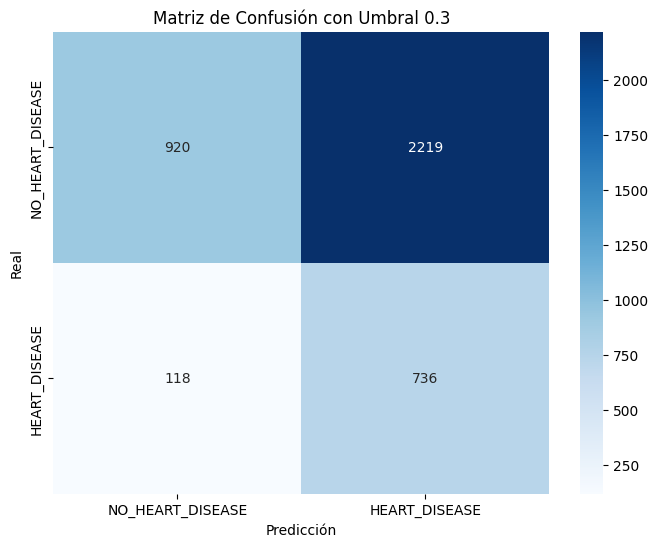

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'], yticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión con Umbral ' + str(umbral))
plt.show()


##### TEST: CAMBIO DE UMBRAL (0.4) - Model evaluation: Random Forest Classifier

Me BAJA el recall, me SUBE el acc y el RECALL de 0

In [ ]:
y_proba = rf.predict_proba(x_test)[:, 1]

In [ ]:
umbral = 0.4
y_pred = (y_proba >= umbral).astype(int)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1526 1613]
 [ 211  643]]
              precision    recall  f1-score   support

           0       0.88      0.49      0.63      3139
           1       0.29      0.75      0.41       854

    accuracy                           0.54      3993
   macro avg       0.58      0.62      0.52      3993
weighted avg       0.75      0.54      0.58      3993



In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'], yticklabels=['NO_HEART_DISEASE', 'HEART_DISEASE'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión con Umbral ' + str(umbral))
plt.show()


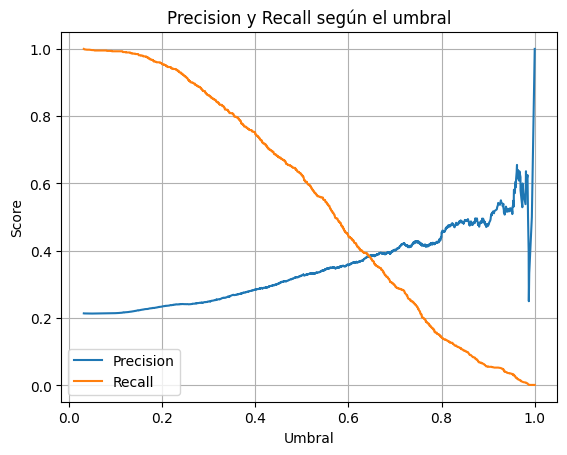

In [ ]:
from sklearn.metrics import precision_recall_curve

probas = rf.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probas)

import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Umbral')
plt.ylabel('Score')
plt.legend()
plt.title('Precision y Recall según el umbral')
plt.grid(True)
plt.show()